In [ ]:
from nbdev import *
%nbdev_default_export plotting

Cells will be exported to pct.plotting,
unless a different module is specified after an export flag: `%nbdev_export special.module`


# Plotting

> Plotting classes.

In [ ]:
#export
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from random import random

In [ ]:
#export
class SubPlotter(object):

  def __init__(self, width, height, title, plotsconfig=[["title", "xlabel", "ylabel", 1, 0, 111, ['line1']]]):
      
    style.use('fivethirtyeight')
    self.fig = plt.figure(figsize=[width, height])
    self.fig.canvas.set_window_title(title)
    
    self.plots=[]
    self.colors=['b',  'r', 'g', 'c', 'm', 'y', 'k', 'w']

    for plotconfig in plotsconfig:
        #print(plotconfig)
        ys=[]
        for line in range(plotconfig[3]):
            ys.append([])
            
        plot = dict([("title", plotconfig[0]), ("xlabel", plotconfig[1]), 
                     ("ylabel", plotconfig[2]), ("window", plotconfig[4]), 
                     ("subplot", plt.subplot(plotconfig[5])), ("x", []), ("ys", ys),
                     ("lines", plotconfig[6])])

        self.plots.append(plot)
    
  def add_data(self, index, x, ys):
    #print(ys)
    plot= self.plots[index]
    plot["x"].append(x)
    for i in range(len(ys)):
        plot["ys"][i].append(ys[i])
    window = plot["window"]
    if window > 0:
        if x > window:
            plot["x"].pop(0)
            for i in range(len(ys)):
                plot["ys"][i].pop(0)
            
  def add_history_data(self, x, data):
    for index, plot in enumerate(self.plots):
        yvals = []
        for line in plot["lines"]:
            y = data[line][-1]
            yvals.append(y)
        self.add_data(index, x, yvals)

  def show(self):
    plt.show()
        
  def draw(self):
    for plot in self.plots:
        plot["subplot"].clear()
        #print(plot["ys"])
        ctr=0
        for y, line in zip(plot["ys"], plot["lines"]):
            plot["subplot"].plot(plot["x"], y, self.colors[ctr], label=line, linewidth=2)
            ctr+=1
        plot["subplot"].set_title(plot["title"])
        plot["subplot"].set_xlabel(plot["xlabel"])
        plot["subplot"].set_ylabel(plot["ylabel"])
        plot["subplot"].legend()

    plt.tight_layout()


In [ ]:
#export
def run_hpct_animation(hpct, counter=None, plotter=None, interval=1):
    anim_running = True
    
    def onClick(event):
            nonlocal anim_running
            if anim_running:
                anim.event_source.stop()
                anim_running = False

            else:
                anim.event_source.start()
                anim_running = True
                
    
    def animate(epoch):
        nonlocal anim_running
        if epoch>0:
            if epoch <= counter.get_limit():
                counter()
                if counter.pause and counter.get() % counter.display == 0:
                    anim_running = False
                    anim.event_source.stop()
                else:
                    x = counter.get()
                    hpct.run(steps=1, verbose=False)                    
                    history = hpct.get_history_data()
                    plotter.add_history_data(x, history)
                    plotter.draw()
        else:
            print("init here", epoch)
    
    plotter.fig.canvas.mpl_connect('button_press_event', onClick)
 
    anim = animation.FuncAnimation(plotter.fig, animate, interval=interval, repeat=False)

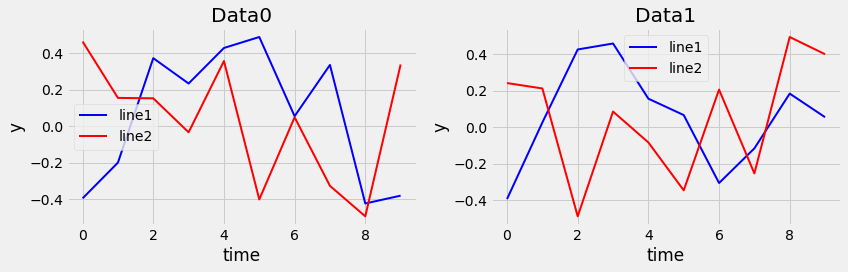

In [ ]:
window = 20
plotter = SubPlotter(12, 4, "MyData", [["Data0", "time", "y", 2, window, 121, ['line1','line2']], 
                                       ["Data1", "time", "y", 2, window, 122, ['line1','line2']]])

for x in  range(10):
    y11 = random()-0.5
    y12 = random()-0.5
    plotter.add_data(0, x, [y11, y12])
    y21 = random()-0.5
    y22 = random()-0.5                
    plotter.add_data(1, x, [y21, y22])
                    
plotter.draw()

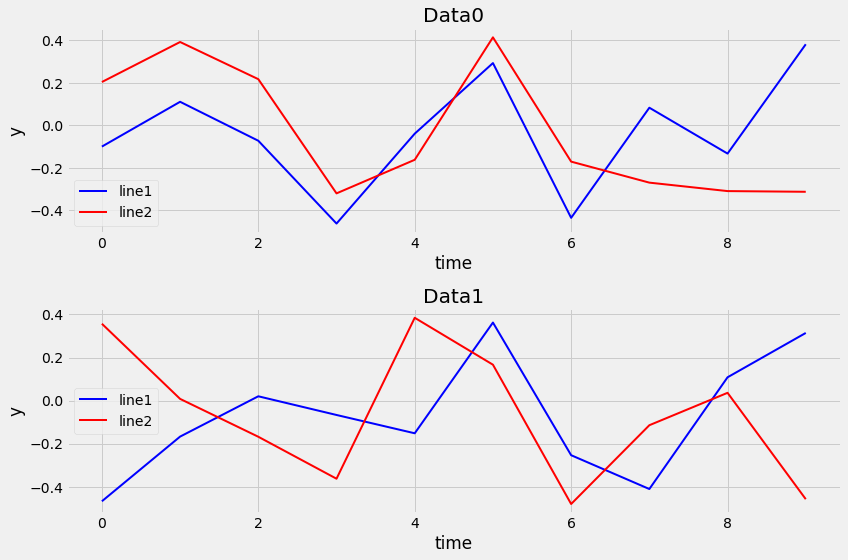

In [ ]:
window = 20
plotter = SubPlotter(12, 8, "MyData", [["Data0", "time", "y", 2, window, 211, ['line1','line2']], 
                                       ["Data1", "time", "y", 2, window, 212, ['line1','line2']]])

for x in  range(10):
    y11 = random()-0.5
    y12 = random()-0.5
    plotter.add_data(0, x, [y11, y12])
    y21 = random()-0.5
    y22 = random()-0.5                
    plotter.add_data(1, x, [y21, y22])
                    
plotter.draw()

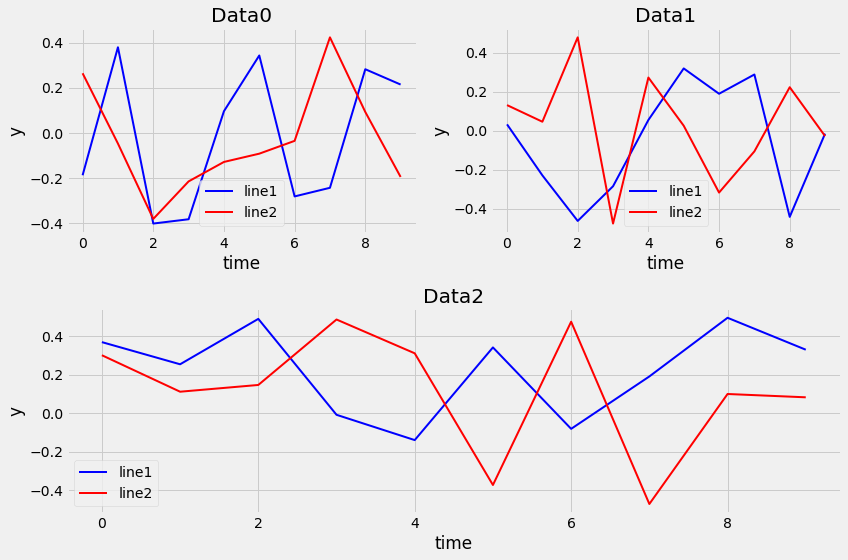

In [ ]:
window = 20
plotter = SubPlotter(12, 8, "MyData", [["Data0", "time", "y", 2, window, 221, ['line1','line2']], 
                                       ["Data1", "time", "y", 2, window, 222, ['line1','line2']],
                                       ["Data2", "time", "y", 2, window, 212, ['line1','line2']]])

for x in  range(10):
    y11 = random()-0.5
    y12 = random()-0.5
    plotter.add_data(0, x, [y11, y12])
    y21 = random()-0.5
    y22 = random()-0.5                
    plotter.add_data(1, x, [y21, y22])
    y21 = random()-0.5
    y22 = random()-0.5                
    plotter.add_data(2, x, [y21, y22])
                    
plotter.draw()